In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [44]:
# The import statement is modified from the lecture notebook and my previous homework.
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    RandomizedSearchCV
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
import shap
from sklearn import set_config
set_config(display="diagram")

ModuleNotFoundError: No module named 'shap'

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

<span style="color:blue">For this project, I choose to use the [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset) (Option 1) and focus on the classification problem. "This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005" (Kaggle, 2016). The target in this dataset is the `default.payment.next.month` binary variable which indicates whether a person will default in the coming month. Our ultimate goal for this project is to use the given features (24 available features) to predict the payment status (whether a person fails to pay) in the coming month on real-world deployment data. By accurately predicting potential clients that may default next month, the bank can better reduce the loss of unpaid credit card bills by identifying and monitoring high-risk clients beforehand. The financial institution can take a step ahead such as setting an alarm and reducing the credit limit to a client, enhancing the risk-management and decision-making strategies. This dataset has 30000 examples, which is large enough for our project.</span>

In [3]:
default_df = pd.read_csv("data/UCI_Credit_Card.csv",index_col='ID')
default_df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<span style="color:blue">I set the `ID` column as the index of this dataset because this variable is just the ID of each client, ranging from 1 to 30000, and does not provide any descriptive meaning in model training and prediction.</span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df= train_test_split(default_df, test_size=0.3, random_state=123)
display(train_df.head(5),test_df.head(5),train_df.shape,test_df.shape)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1,2,36,0,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21449,440000.0,2,1,2,30,-1,-1,-1,0,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25756,120000.0,2,2,1,30,0,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1439,50000.0,1,2,2,54,1,2,0,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
25666,40000.0,2,2,2,26,-1,0,0,0,-1,...,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0,0
16465,80000.0,2,3,1,59,0,0,0,0,0,...,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0,0
22387,170000.0,2,1,2,30,2,2,2,2,2,...,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0,1
10150,200000.0,2,2,1,41,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0,1
8730,50000.0,1,2,1,43,0,0,0,0,0,...,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0,0


(21000, 24)

(9000, 24)

<span style="color:blue">We can see that the training set has 21000 observations and the testing set has 9000 observations, which agrees with 70%-30% split. And I set `random_state=123` for reproducibility.</span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   21000 non-null  float64
 1   SEX                         21000 non-null  int64  
 2   EDUCATION                   21000 non-null  int64  
 3   MARRIAGE                    21000 non-null  int64  
 4   AGE                         21000 non-null  int64  
 5   PAY_0                       21000 non-null  int64  
 6   PAY_2                       21000 non-null  int64  
 7   PAY_3                       21000 non-null  int64  
 8   PAY_4                       21000 non-null  int64  
 9   PAY_5                       21000 non-null  int64  
 10  PAY_6                       21000 non-null  int64  
 11  BILL_AMT1                   21000 non-null  float64
 12  BILL_AMT2                   21000 non-null  float64
 13  BILL_AMT3                   2100

<span style="color:blue">We can see that all features are encoded as numerical type, even those categorical, ordinal, binary features, and our target variable `default.payment.next.month`. For visualization purposes, I will convert some important categorical variables such as `SEX`, `EDUCATION`, `MARRIAGE`, and our target variable `default.payment.next.month` to `category` type.</span>

In [6]:
train_df['SEX'] = train_df['SEX'].astype('category')
train_df['EDUCATION'] = train_df['EDUCATION'].astype('category')
train_df['MARRIAGE'] = train_df['MARRIAGE'].astype('category')
train_df['default.payment.next.month'] = train_df['default.payment.next.month'].astype('category')
test_df['SEX'] = test_df['SEX'].astype('category')
test_df['EDUCATION'] = test_df['EDUCATION'].astype('category')
test_df['MARRIAGE'] = test_df['MARRIAGE'].astype('category')
test_df['default.payment.next.month'] = test_df['default.payment.next.month'].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16396 to 19967
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   21000 non-null  float64 
 1   SEX                         21000 non-null  category
 2   EDUCATION                   21000 non-null  category
 3   MARRIAGE                    21000 non-null  category
 4   AGE                         21000 non-null  int64   
 5   PAY_0                       21000 non-null  int64   
 6   PAY_2                       21000 non-null  int64   
 7   PAY_3                       21000 non-null  int64   
 8   PAY_4                       21000 non-null  int64   
 9   PAY_5                       21000 non-null  int64   
 10  PAY_6                       21000 non-null  int64   
 11  BILL_AMT1                   21000 non-null  float64 
 12  BILL_AMT2                   21000 non-null  float64 
 13  BILL_AMT3        

In [7]:
train_df.describe(include="all")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.0,21000.0,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.0
unique,NaN,2.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,12616.0,9815.0,11210.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16312.0
mean,167880.651429,NaN,NaN,NaN,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,-0.264429,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,NaN
std,130202.682167,NaN,NaN,NaN,9.212644,1.120465,1.194506,1.196123,1.168556,1.137205,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,NaN
min,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,NaN
50%,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,NaN
75%,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,NaN


<span style="color:blue">This table contains all useful summary statistics of each column in the training set. For all columns, it displays the count of values in each column. For categorical variables, it shows how many distinct levels there are in each variable, along with the most frequent level and its frequency. For numerical variables, it includes information such as mean, standard deviation, minimum, maximum, first quartile, median, and third quartile. More initial observations about the data from this table will be summarized at the end of this question.</span>

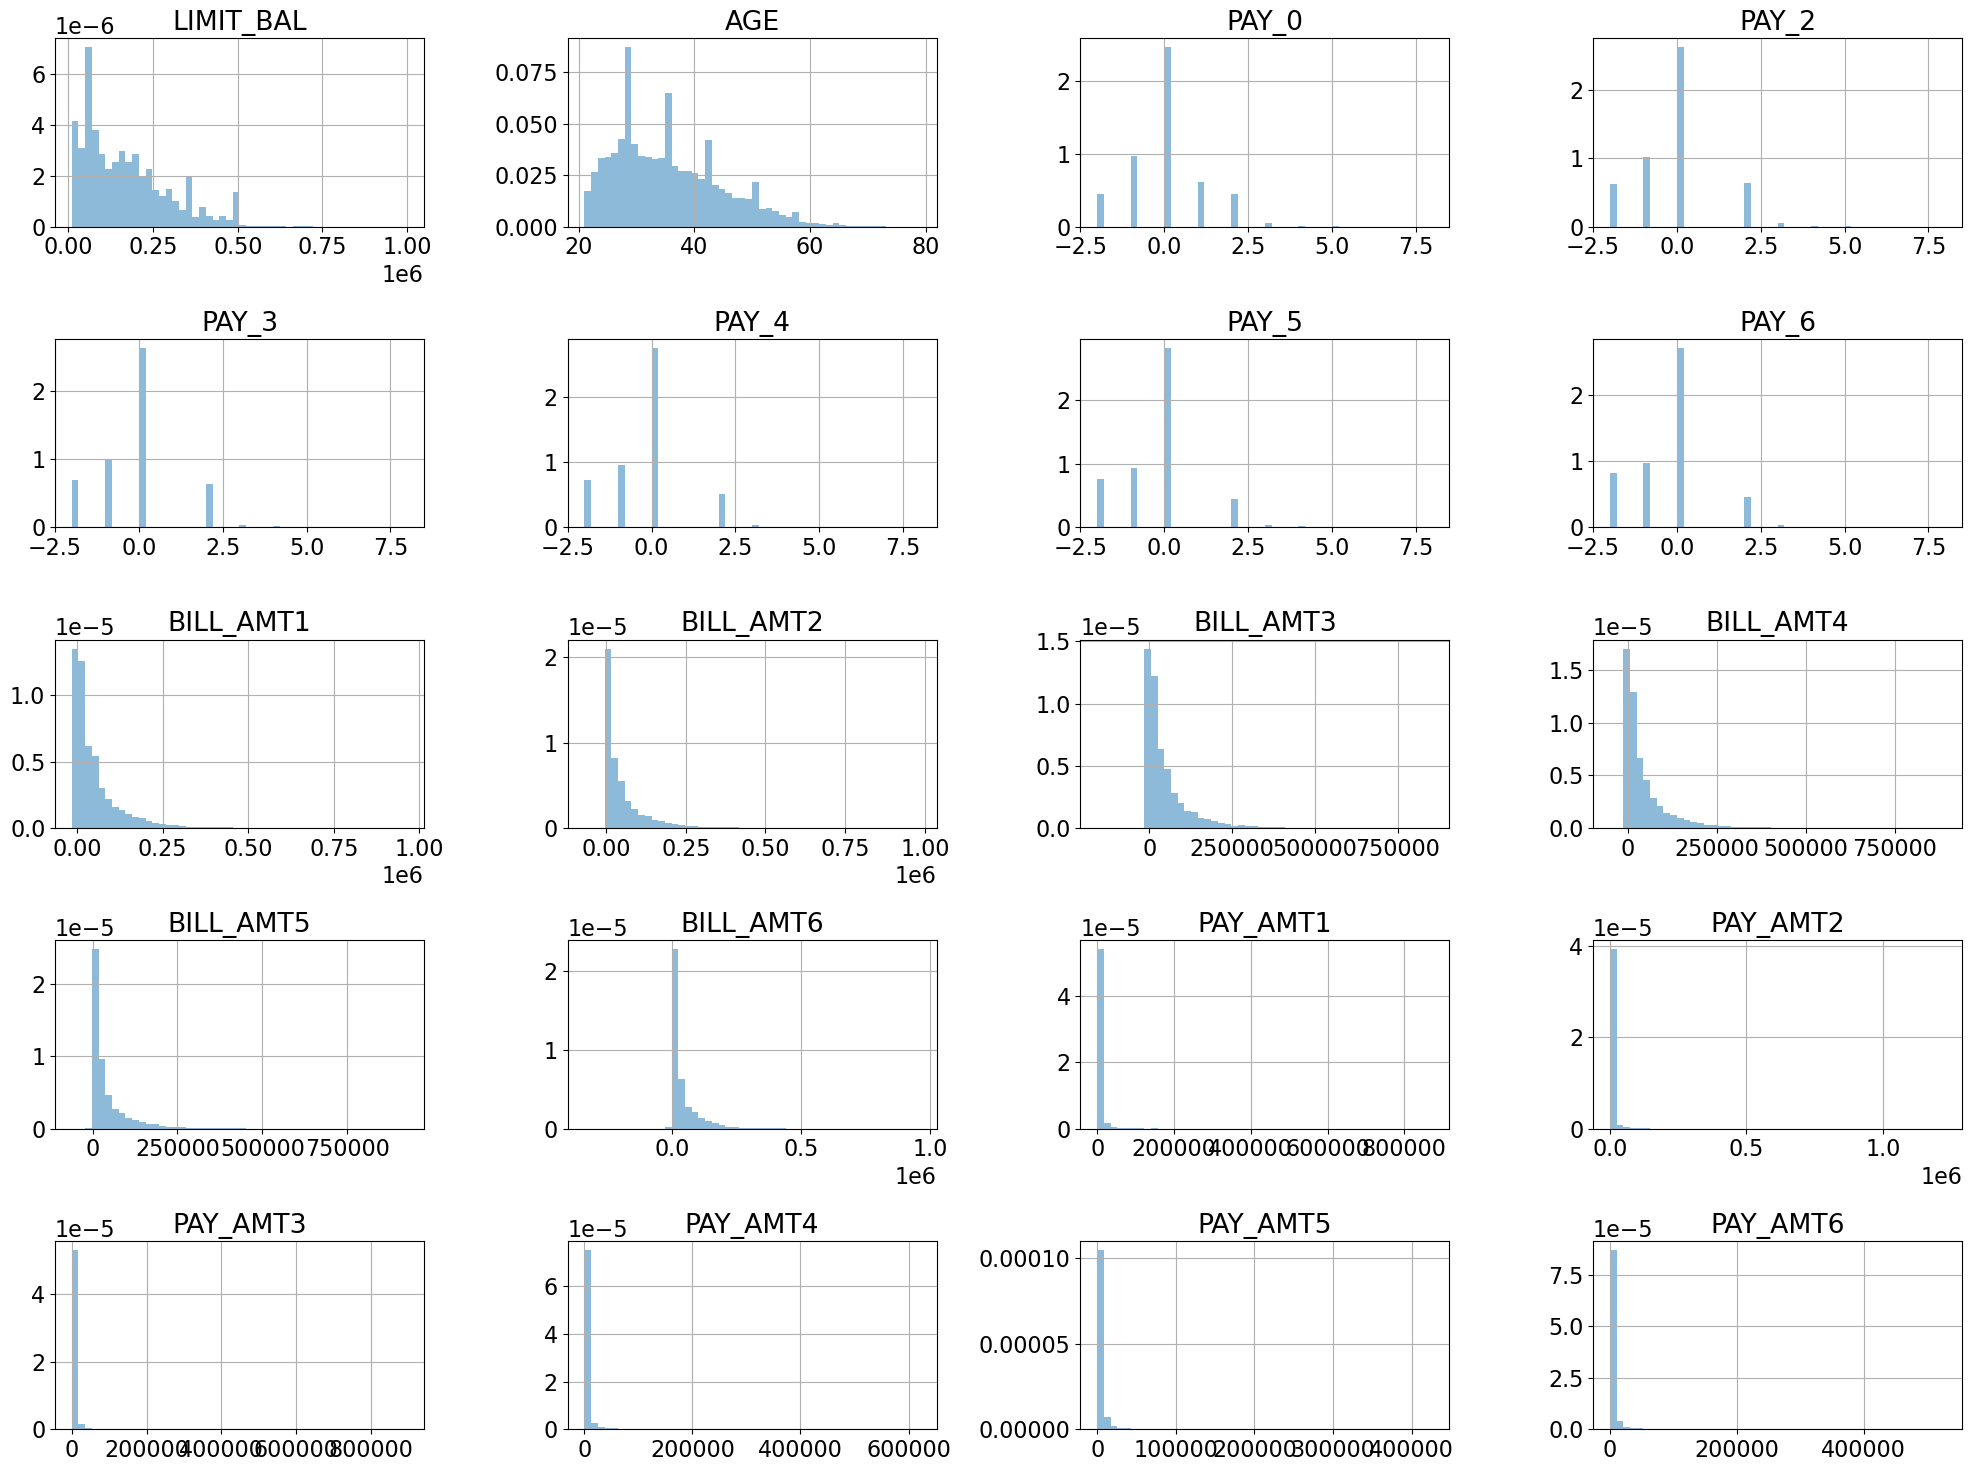

In [8]:
train_df.hist(bins=50, figsize=(20, 15), alpha=0.5, density = True)
plt.tight_layout()

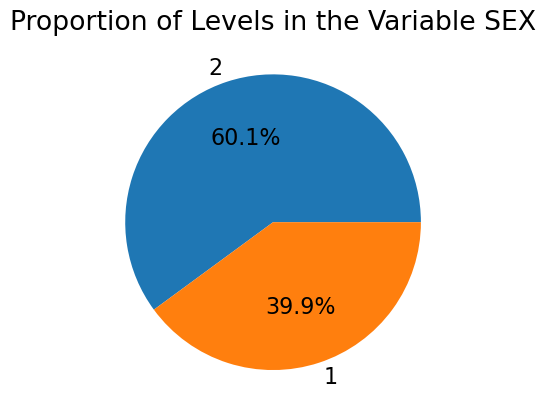

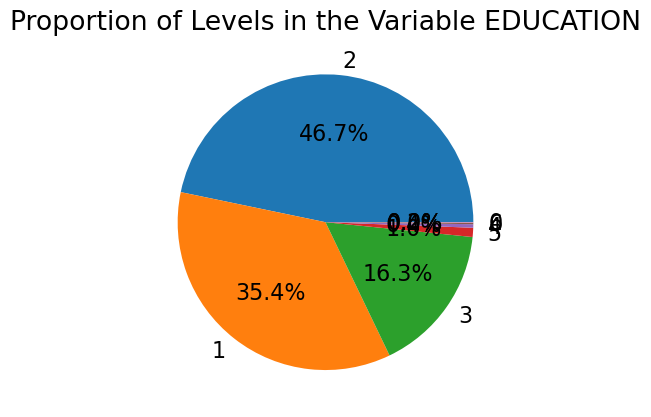

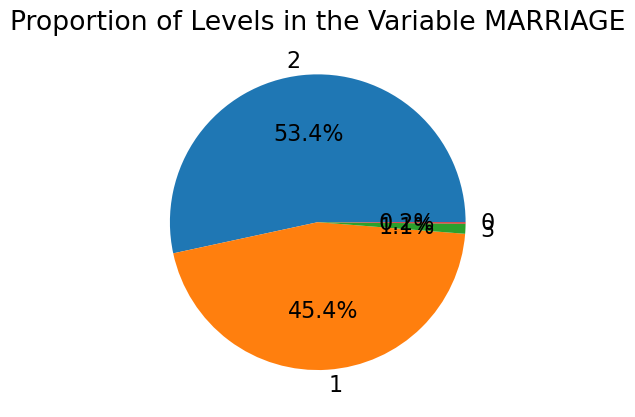

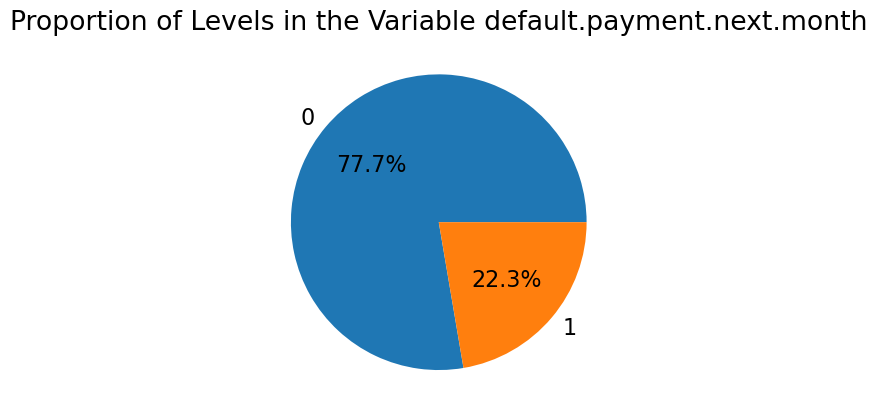

In [9]:
# I used ChatGPT to help with some functions in the matplotlib (plt) library.

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']
for categorical_column in categorical_columns:
    value_counts = train_df[categorical_column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Proportion of Levels in the Variable {categorical_column}')
    plt.show()

<span style="color:blue">The set of 20 histograms illustrate the distribution of each numerical variable in the training set. And the 4 pie charts display the proportion of levels in each categorical variable. More initial observations about plots will be summarized at the end of this question.</span>

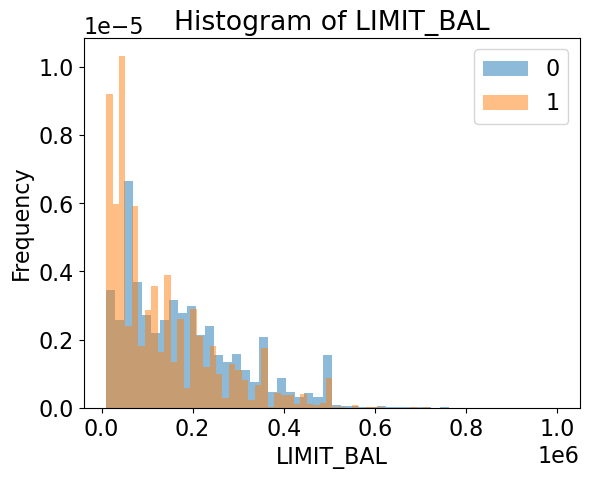

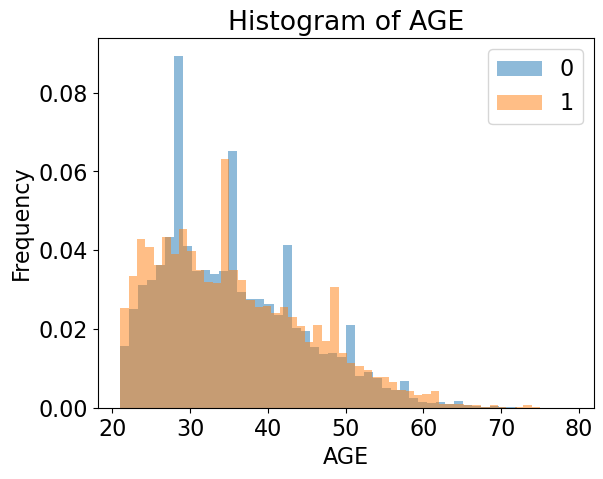

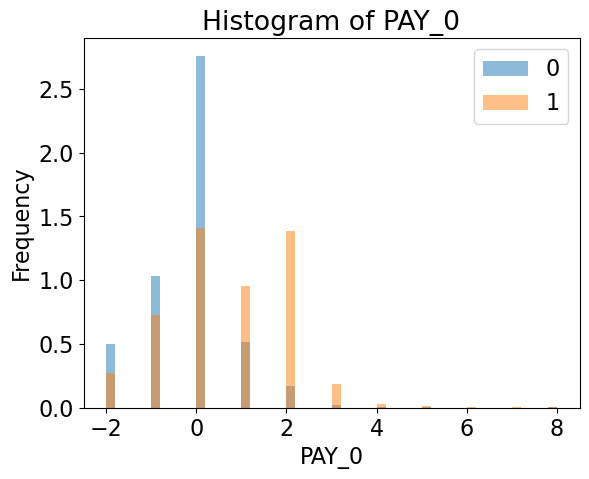

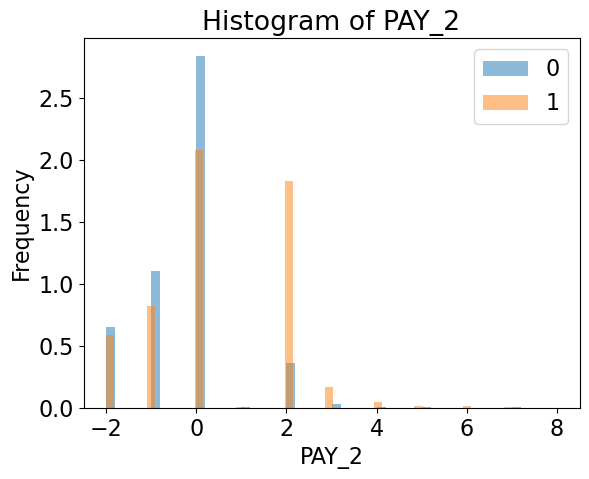

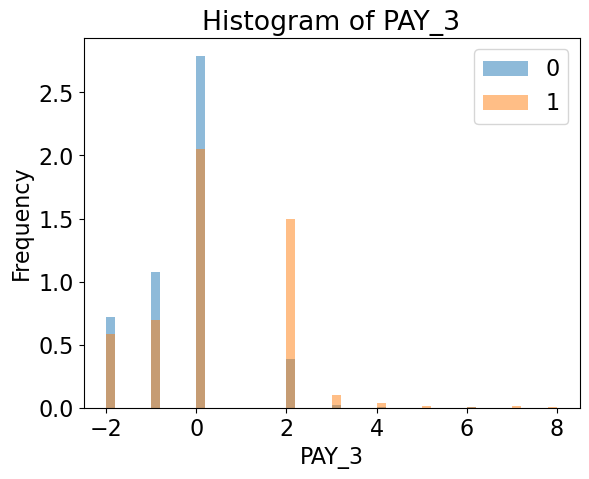

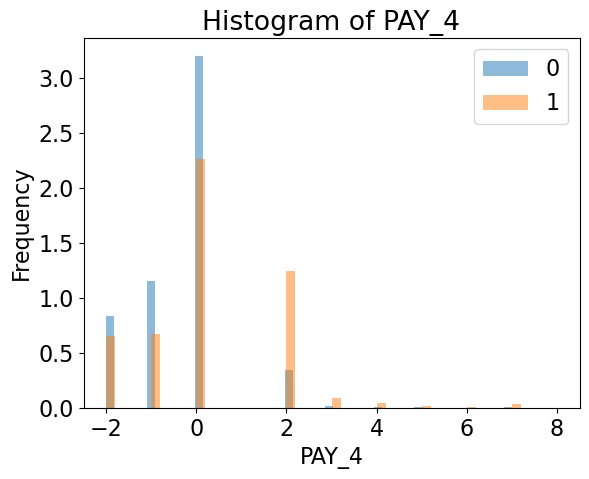

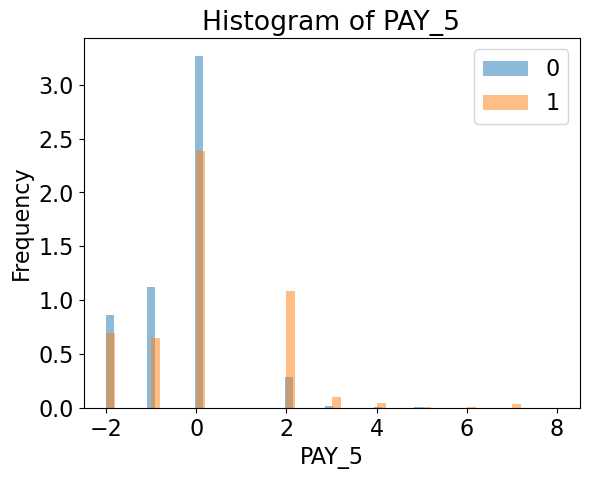

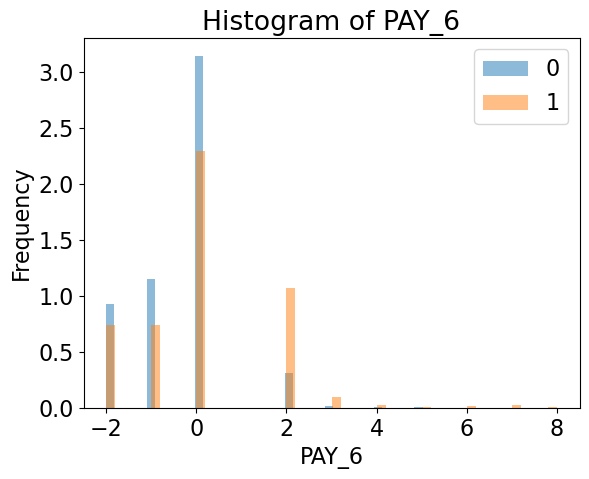

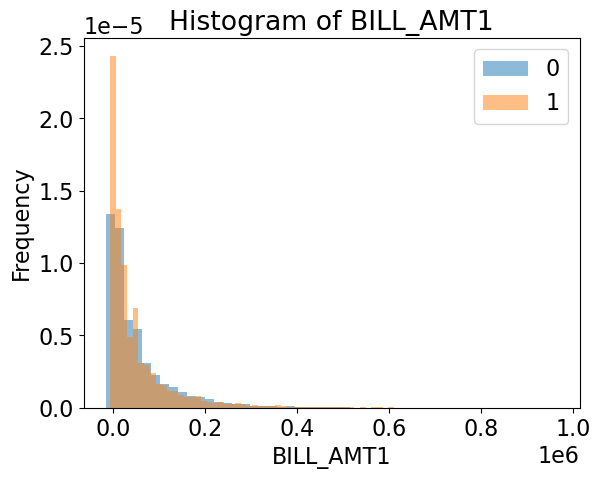

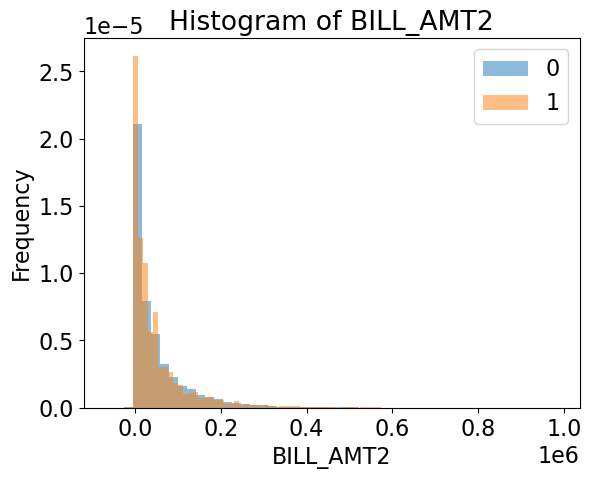

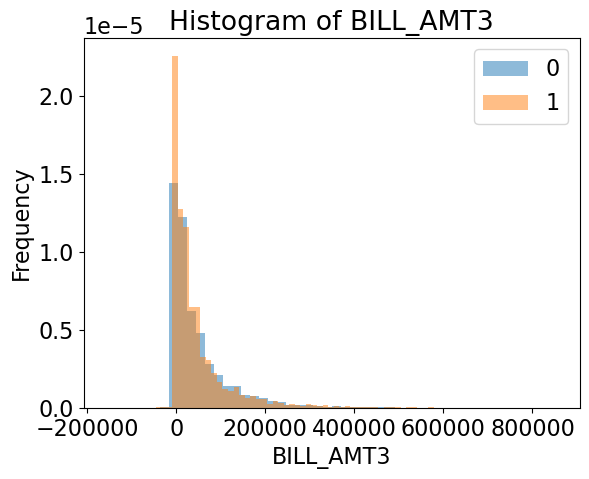

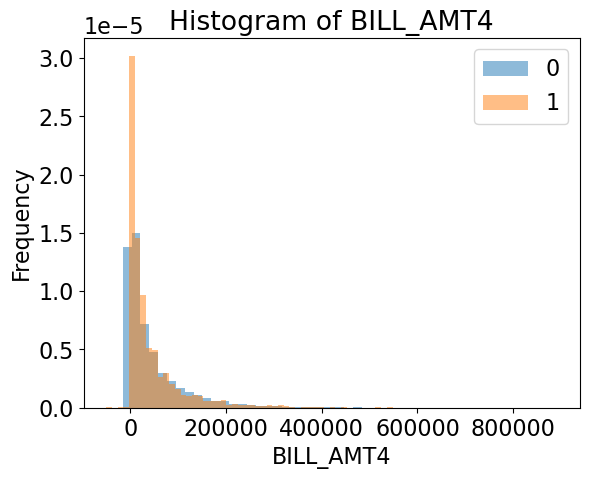

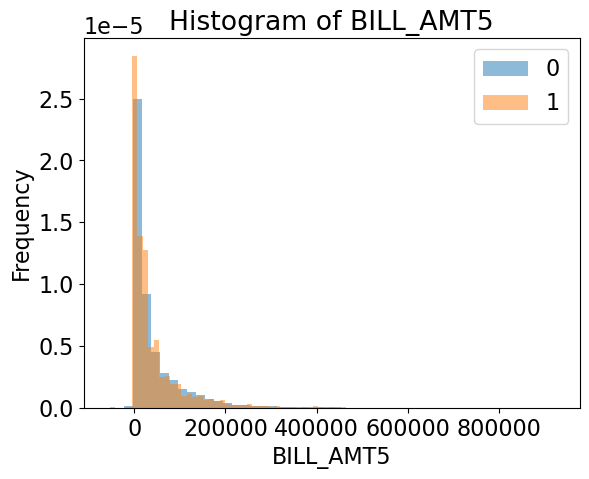

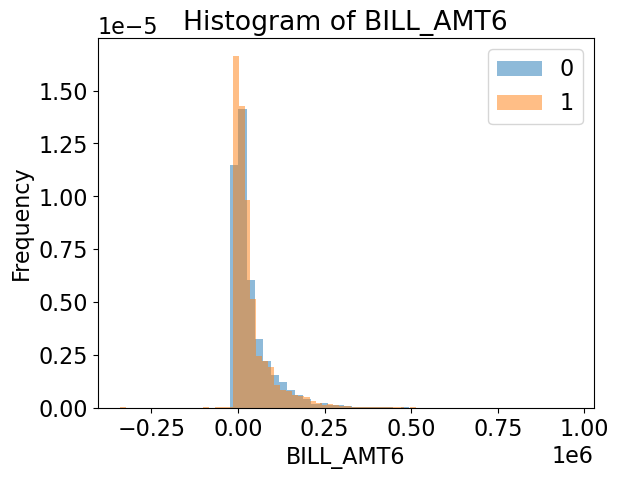

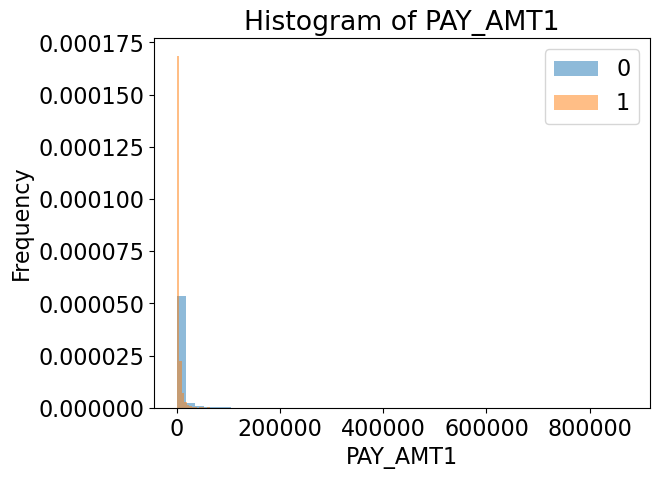

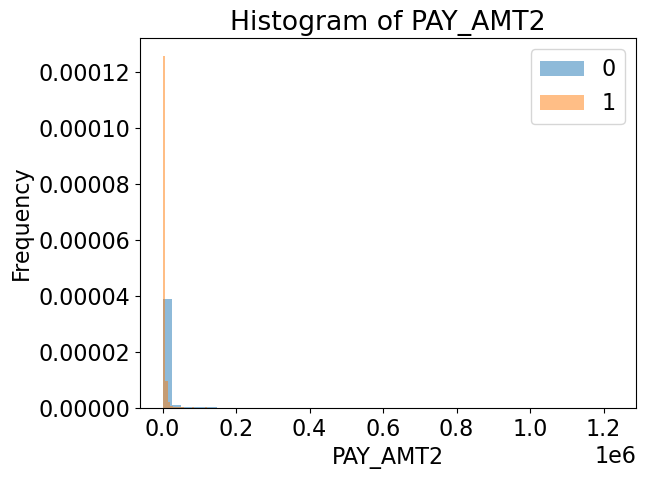

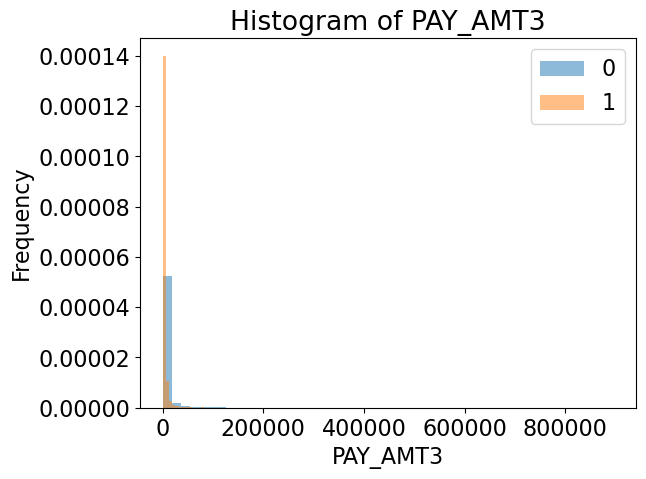

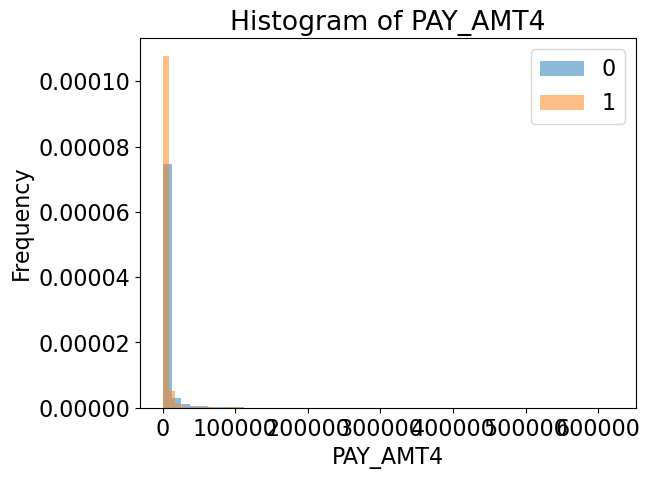

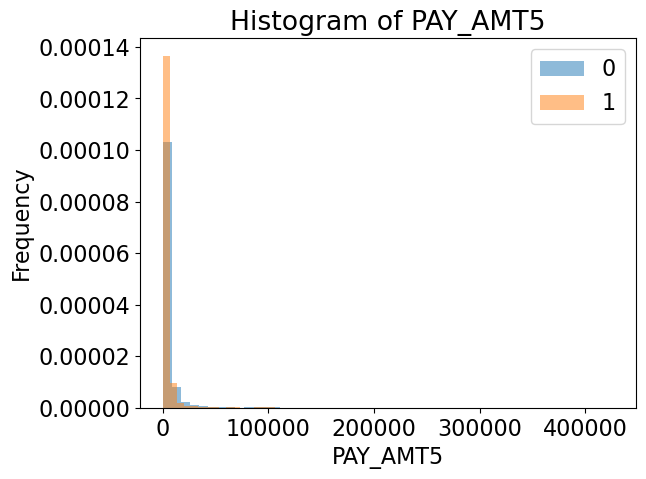

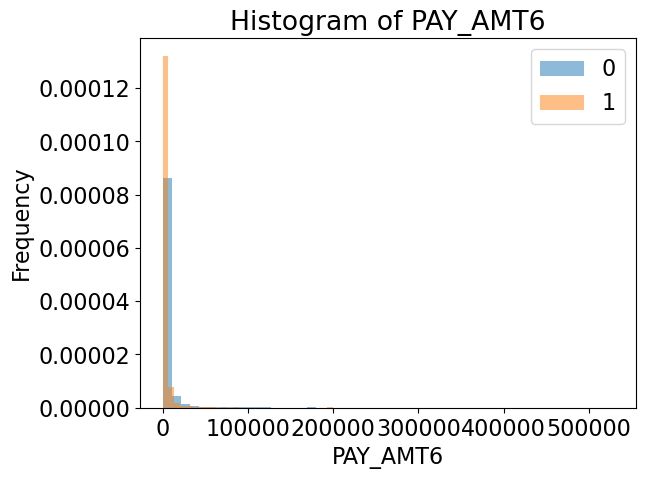

In [10]:
# I refer to the code I used for the histogram question in HW2 and HW3.
# I used ChatGPT to help with the `select_dtypes` function.
numerical_columns = train_df.select_dtypes(include= ['float64', 'int64']).columns.tolist()
for col in numerical_columns:
    train_df.groupby("default.payment.next.month", observed=True)[col].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + col)
    plt.xlabel(col)
    plt.show()

<span style="color:blue">The visualization above produces histograms for all numerical features in the training set, showing the distribution of the feature values in the training set, separated for `default.payment.next.month` = 0 (no default payment) and `default.payment.next.month` = 1 (default payment). For each plot, two histograms overlaid on top of each other, separated by color. More initial observations about the data from this table will be summarized at the end of this question below.</span>

* <span style="color:blue"> Initial observations about the data: From the table we obtained from the `describe()` function, we can see that all columns do not have any missing values, indicating that imputation is unnecessary for preprocessing and transformations. For categorical columns, it shows that `SEX` and our target variable `default.payment.next.month` are binary; `EDUCATION` has 7 distinct levels, and `MARRIAGE` has 4 distinct levels. We can see that all other numerical features are at different scales. For example, the feature `AGE` has a relatively smaller scale compared to features such as `BILL_AMT*` and `PAY_AMT*`. In addition, the set of histograms of each numerical feature also indicates that some of them are actually right-skewed. Therefore, we might need to scale these features before fitting the model. The last set of histograms shows the distribution of the feature values in the training set, separated by `default.payment.next.month` =0 (no default payment) and `default.payment.next.month` =1 (default payment). However, it does show a very distinct pattern or distribution of the two classes; in most cases, these histograms for  `default.payment.next.month` = 1 overlap with those for `default.payment.next.month` = 0. We do not find features that stand out and can significantly affect the target variable based on these plots. The four pie charts also provide useful information. For example, some levels in the categorical features have very small proportions. When we do cross-validation, we may get unlucky that the training set does not have any data on these levels. To better handle this, we may want to set `handle_unknown="ignore"` in our `OneHotEncoder`. More justification will be provided in the "Preprocessing and transformations" section. For our target variable `default.payment.next.month`, the last pie chart shows that we have a significant class imbalance in the dataset; we have  77.7% of `default.payment.next.month` =0 (no default payment) but only 22.3% `default.payment.next.month` =1 (default payment). This is a sign that we need to be extra careful not to rely too much on model accuracy when evaluating models. Features from `PAY_0` to `PAY_6`, based on the histograms, are numerical but discrete variables. They take only integers from -2 to 8. Consideration of whether we should treat them as numerical features or ordinal features is necessary. More justification for this will be provided in the "Preprocessing and transformations" section.<br><br>

* <span style="color:blue"> Appropriate metric/metrics for assessment: First of all, we notice that accuracy is not an appropriate metric for this problem because we have class imbalance; we could have misleading results if we use accuracy. Then I take into account both recall and precision. The goal of this project is to predict " whether a person will default (fail to pay) their credit card bills" next month. The cost of failing to flag an actual default client (false negatives) is very high because if a client ends up defaulting, it can have severe consequence consequences on both the client and the back. Therefore, the recall of the model is very important because we want to capture as many actual defaulters as possible. On the other hand, misclassifying a good client as a defaulter can also be potentially costly. If we have too many false positives, the back may spend too much unnecessary time and resources on that but fail to focus on those actual default clients. Therefore, we want a high precision for the model as well. Since recall and precision come as a trade-off, we need one summative metric to represent both metrics. I decided to use the **AP-score (Average Precision Score)** for model evaluation because it can summarize the trade-off between precision and recall at different classification thresholds and measure the balance of both metrics that we want to achieve. The AP-score (Average Precision Score) is the area under the PR curve across different classification thresholds and it combines precision and recall into a single metric, giving us a sense of how well the model balances these two. We want a model with a higher AP score (closer to 1 is better) because it indicates that the model could achieve the recall and precision to its best level.</span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

 <span style="color:blue"> I decided to create two new columns called `BILL_AMT_AVE` and `PAY_AMT_AVE` that measures the average amount of bill statements from April to September (`BILL_AMT1` to `BILL_AMT6`) and average amount of previous payment from April to September (`PAY_AMT1` to `PAY_AMT6`) respectively. The individual payment and bill amounts for each month may not be representative enough of the credit behavior of clients on average. For example, maybe a client simply forgets to pay the bill that month, but it doesn't mean that they will likely default in the future. <br>Note: we do this for both the training and testing set.</span>

In [11]:
train_df['BILL_AMT_AVE'] = train_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
train_df['PAY_AMT_AVE'] = train_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                     'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
test_df['BILL_AMT_AVE'] = test_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
test_df['PAY_AMT_AVE'] = test_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                     'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
display(train_df.head(5),test_df.head(5),train_df.shape,test_df.shape)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_AMT_AVE,PAY_AMT_AVE
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1,2,36,0,0,0,0,0,...,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0,19868.833333,3505.166667
21449,440000.0,2,1,2,30,-1,-1,-1,0,0,...,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0,88137.666667,47954.333333
20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,...,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-18.000000,0.000000
25756,120000.0,2,2,1,30,0,0,0,0,0,...,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0,88447.000000,3356.000000
1439,50000.0,1,2,2,54,1,2,0,0,0,...,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0,34180.166667,1100.000000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_AMT_AVE,PAY_AMT_AVE
ID,,,,,,,,,,,,,,,,,,,,,
25666,40000.0,2,2,2,26,-1,0,0,0,-1,...,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0,0,21617.166667,5892.166667
16465,80000.0,2,3,1,59,0,0,0,0,0,...,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0,0,58270.166667,2138.333333
22387,170000.0,2,1,2,30,2,2,2,2,2,...,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0,1,162134.833333,5466.666667
10150,200000.0,2,2,1,41,-2,-2,-2,-2,-2,...,0.0,742.0,0.0,0.0,0.0,0.0,0.0,1,4050.833333,123.666667
8730,50000.0,1,2,1,43,0,0,0,0,0,...,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0,0,8925.166667,608.000000


(21000, 26)

(9000, 26)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

* <span style="color:blue"> The only feature I decided to drop is the `ID`, but I have set it as the index of the dataset so we don't need to manually drop it anymore. I decided not to drop any other features at this stage because based on the documentation they may be potentially influential. More of this will be explored in the "Feature Selection" section.</span>
* <span style="color:blue"> Numerical features are `LIMIT_BAL`, `AGE`, `BILL_AMT1` to `BILL_AMT6`, `PAY_AMT1` to `PAY_AMT6` and the two new features we engineered in question 4, `BILL_AMT_AVE` and  `PAY_AMT_AVE`. We need to apply scaling (`StandardScaler`) on them because they are on different scales.</span>
* <span style="color:blue"> The only categorical feature that is binary is `SEX`. We need to use `OneHotEncoder` on it **with** `drop="if_binary"`.</span>
* <span style="color:blue"> `EDUCATION` and `MARRIAGE` are categorical features with more than two levels. We need to use `OneHotEncoder` on them **without** `drop="if_binary"`. In specific, I set `handle_unknown="ignore"` because some levels have very little data so they might get unlucky and not appear in the training stage.</span>
* <span style="color:blue"> In particular, `PAY_0` to `PAY_6` are ordinal. But according to the [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset) on Kaggle, they are already encoded as integers ranked in order. Therefore, we can safely pass through these features.</span>

In [12]:
numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5',
                    'BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
                    'BILL_AMT_AVE','PAY_AMT_AVE']
binary_feature = ['SEX']
categorical_features = ['MARRIAGE', 'EDUCATION']
passthrough_features = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]

In [13]:
numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False, dtype=int)

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_feature),
    (categorical_transformer, categorical_features),
    ("passthrough", passthrough_features)
)

In [14]:
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'BILL_AMT_AVE', 'PAY_AMT_AVE']),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['SEX']),
                                ('onehotencoder-2',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['MARRIAGE', 'EDUCATION']),
                                ('passthrough', 'passthrough',
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [15]:
# Credit: I reused the definition of the function `mean_std_cross_val_scores` provided in lecture 5 notebook 
# with sight modifications.

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [16]:
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

In [17]:
results = {}
scoring_metric = "average_precision"
results["Baseline model (Dummy Classifier)"] = mean_std_cross_val_scores(
    DummyClassifier(random_state=123, strategy="most_frequent"), X_train, y_train, 
    return_train_score=True, scoring=scoring_metric)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)


<span style="color:blue"> The dummy classifier `DummyClassifier(random_state=123, strategy="most_frequent")` will predict everything as the most frequent label in the training set target, which is `default.payment.next.month = 0` (no default payment). Even though the precision is not defined because we don't have any positive prediction, `Scikit-learn` will still return a small non-zero AP score that corresponds to the proportion of the minority class in the dataset. Therefore, `average_precision = 0.223` matches the distribution of the target I showed in the "EDA" section that only 22.3% of the data has `default.payment.next.month` = 1. Overall, an AP score of 0.223 is not satisfying, and this score can be set as a baseline for comparison with other models. </span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

<span style="color:blue"> I also tried to use the `lass_weight="balanced"` arguments in the models in Questions 7 and 8, but it doesn't improve the evaluation score; instead, it even makes the score for some models worse. Therefore, I decided to abandon this option in this project. More about the `class_weight` argument may be explored in further analysis.</span>

In [21]:
lgr_model = LogisticRegression(random_state=123)
pipe_lgr = make_pipeline(preprocessor, lgr_model)

In [22]:
# The reference codes are in the lecture notebook (Lecture 8).
param_grid_lgr = {
    "logisticregression__C": np.logspace(-6, 8, num=1000),
}
random_search_lgr = RandomizedSearchCV(pipe_lgr,                                    
                  param_distributions = param_grid_lgr, 
                  n_iter=50, 
                  n_jobs=-1, 
                  random_state=123,
                  scoring=scoring_metric,
                  return_train_score=True)
random_search_lgr.fit(X_train, y_train)
print(random_search_lgr.best_params_)

{'logisticregression__C': np.float64(20621.218039991447)}


In [23]:
# The reference codes are in the lecture notebook (Lecture 8).
pd.DataFrame(random_search_lgr.cv_results_)[
    [
        "mean_test_score",
        "param_logisticregression__C", 
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().head(10)

,mean_test_score,param_logisticregression__C,mean_fit_time
rank_test_score,,,
1,0.509504,2.062122e+04,0.390695
2,0.509496,2.584714e+04,0.366327
3,0.509492,1.312557e+04,0.366303
4,0.509488,8.850075e-02,0.328715
5,0.509488,4.827071e+03,0.389310
6,0.509485,6.979814e-01,0.437921
7,0.509481,2.887091e+00,0.380603
8,0.509479,4.620241e+04,0.394422
9,0.509477,2.110203e+02,0.399187


In [24]:
results["Logistic Regression with best C"] = mean_std_cross_val_scores(
    random_search_lgr.best_estimator_, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)
Logistic Regression with Best C,0.167 (+/- 0.018),0.016 (+/- 0.001),0.510 (+/- 0.016),0.512 (+/- 0.004)


<span style="color:blue">I use `RandomizedSearchCV` to carry out hyperparameter tuning for the complexity hyperparameter `C` in the logistic regression model.  I randomly search from $10^{-6}$ to $10^{8}$, but it seems that the logistic regression model is not sensitive to the complexity hyperparameter `C`. The best value of `C` is $2.062122\times10^4$, but many other values of `C` seem to have very similar performance because the differences in the `mean_test_score` column are negligible. This could occur for a couple of reasons. For example, some features in the dataset may actually act as "noises" or are very unstable and biased. More on this can be explored in the "Feature Selection" section below. Regardless, I still choose the best hyperparameter to fit the model and the result is shown above. The training and testing (cross-validation) scores are 0.512 and 0.510 respectively. There is no sign of overfitting, but the logistic regression model does somehow underfit. These AP scores are much better than the baseline even though it is still not optimal. In addition, the standard errors of these scores are relatively small, which should not be a concern. The fitting time of the logistic regression model is much longer than its scoring time, but the overall fitting and scoring time is still very acceptable compared to some more complex models.	</span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

### <span style="color:blue"> k-Nearest Neighbours</span>

In [25]:
knn_model = KNeighborsClassifier()
pipe_knn = make_pipeline(preprocessor, knn_model)
results["k-NNs with default hyperparameters"] = mean_std_cross_val_scores(
    pipe_knn, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)
Logistic Regression with Best C,0.167 (+/- 0.018),0.016 (+/- 0.001),0.510 (+/- 0.016),0.512 (+/- 0.004)
k-NNs with default hyperparameters,0.029 (+/- 0.007),0.263 (+/- 0.320),0.422 (+/- 0.012),0.644 (+/- 0.005)


<span style="color:blue">First of all, the mean test score (cross-validation score) is only 0.442 so it doesn't beat the linear model we fitted above. In addition, we can see a big gap of over 0.2 between the training score and the test score (cross-validation score) of the kNNs model, indicating the issue of possible overfitting. As we know, the kNNs model does not learn any parameters when we fit the model so it has a speedy fitting time, but comparably much longer scoring time when we predict the targets. The standard deviations for `fit_time`, `test_score`, and `train_score` are all very small, though it has a relatively larger standard deviation for `score_time`.	</span>

### <span style="color:blue">Support Vector Machines (SVMs) with RBF kernel</span>

In [26]:
svm_model = SVC(random_state=123)
pipe_svm = make_pipeline(preprocessor, svm_model)
results["SVMs-RBF with default hyperparameters"] = mean_std_cross_val_scores(
    pipe_svm, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)
Logistic Regression with Best C,0.167 (+/- 0.018),0.016 (+/- 0.001),0.510 (+/- 0.016),0.512 (+/- 0.004)
k-NNs with default hyperparameters,0.029 (+/- 0.007),0.263 (+/- 0.320),0.422 (+/- 0.012),0.644 (+/- 0.005)
SVMs-RBF with default hyperparameters,19.429 (+/- 2.481),5.862 (+/- 0.344),0.517 (+/- 0.023),0.591 (+/- 0.006)


<span style="color:blue">First of all, the mean test score (cross-validation score) of SVC is about 0.517 so it only slightly beats the linear model we fitted above. In addition, it has a training score of 0.591. Even though we can still observe a small gap between these two scores, it is at least not as bad as the kNNs model, so overfitting might be a potential issue but it is not a major concern here. However, SVC has an incredibly long fitting and scoring time; in fact, it takes the longest time to fit and score among all models we fit in this question. The standard deviations for `test_score` and `train_score` are reasonable, but it has larger standard deviations for `fit_time` and `score_time`. Taking into account the scale of `fit_time` and `score_time`, their standard deviations relative to their magnitudes are still acceptable. 	</span>

### <span style="color:blue">Random Forest (tree-based ensemble model)</span>

In [27]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=123)
pipe_rf = make_pipeline(preprocessor, rf_model)
results["Random Forest with default hyperparameters"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)
Logistic Regression with Best C,0.167 (+/- 0.018),0.016 (+/- 0.001),0.510 (+/- 0.016),0.512 (+/- 0.004)
k-NNs with default hyperparameters,0.029 (+/- 0.007),0.263 (+/- 0.320),0.422 (+/- 0.012),0.644 (+/- 0.005)
SVMs-RBF with default hyperparameters,19.429 (+/- 2.481),5.862 (+/- 0.344),0.517 (+/- 0.023),0.591 (+/- 0.006)
Random Forest with default hyperparameters,0.807 (+/- 0.013),0.049 (+/- 0.007),0.540 (+/- 0.015),1.000 (+/- 0.000)


<span style="color:blue">First of all, the mean test score (cross-validation score) of this random forest model is about 0.54, which is the highest among all models we have fitted so far, and it beats the linear model we fitted above as well. Surprisingly, it has a training score of 1. We may be concerned about overfitting at first, but according to the [lecture notebook](https://ubc-cs.github.io/cpsc330-2024W1/lectures/notes/12_ensembles.html#random-forests), "we often see high training scores for in the context of random forests. That’s normal. It doesn’t mean that the model is overfitting". The random forest model also has a relatively longer fitting time because it fits a set of decision trees under the hood at the same time. Its scoring time is not too bad. The standard deviations for `score_time`, `test_score`, and `train_score` are small, but it has a larger standard deviation for `fit_time`. 	</span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<span style="color:blue">In this section, I carried out feature selection using forward selection. I use the logistic regression model (linear model) `lgr_model` to select features and use the random forest `rf_model` as the final estimator in the pipeline because the random forest model has the best average cross-validation score based on the result in Question 8.	</span>

In [28]:
pipe_rf_with_for_sel = make_pipeline(
    preprocessor,
    SequentialFeatureSelector(lgr_model, 
                              direction="forward", 
                              n_features_to_select='auto', 
                              tol=None),
    rf_model)

results["Random Forest with selected features using forward selection"] = mean_std_cross_val_scores(
    pipe_rf_with_for_sel, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)
Logistic Regression with Best C,0.167 (+/- 0.018),0.016 (+/- 0.001),0.510 (+/- 0.016),0.512 (+/- 0.004)
k-NNs with default hyperparameters,0.029 (+/- 0.007),0.263 (+/- 0.320),0.422 (+/- 0.012),0.644 (+/- 0.005)
SVMs-RBF with default hyperparameters,19.429 (+/- 2.481),5.862 (+/- 0.344),0.517 (+/- 0.023),0.591 (+/- 0.006)
Random Forest with default hyperparameters,0.807 (+/- 0.013),0.049 (+/- 0.007),0.540 (+/- 0.015),1.000 (+/- 0.000)
Random Forest with selected features using forward selection,74.774 (+/- 5.074),0.050 (+/- 0.006),0.490 (+/- 0.023),0.996 (+/- 0.001)


In [29]:
pipe_rf_with_for_sel.fit(X_train, y_train)

# I used ChatGPT to help me with the code to get the selected feature indices.

# Access the fitted feature selector
sfs = pipe_rf_with_for_sel.named_steps['sequentialfeatureselector']

# Get the selected feature indices
selected_indices = sfs.get_support(indices=True)

# Get the column names of all features (after preprocessing)
column_names = (
    numeric_features
    + binary_feature    
    + preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out().tolist()  # Update this name if necessary
    + passthrough_features
)

# Get the names of the selected features
selected_features = [column_names[i] for i in selected_indices]

In [31]:
print(f"The selected features are {selected_features}.")

The selected features are ['BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX', 'MARRIAGE_0', 'MARRIAGE_3', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'PAY_0'].


<span style="color:blue"> The random forest model with selected features does not improve the result at all. Instead, the random forest's mean testing score (cross-validation score) drops from 0.54 to 0.49 with feature selection. This is even worse than the linear model so I decide to abandon it in the next exercises. </span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

<span style="color:blue"> As discussed with the instructor, we are only required to conduct hyperparameter optimization for a couple of models and don't have to do that for all models fitted above. Therefore, I decide to optimize  multiple hyperparameters for the kNNs model `knn_model` and the random forest model `rf_model` with [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).</span>

### <span style="color:blue">Hyperparameter Optimization for k-Nearest Neighbours</span>

In [36]:
# The reference codes are in the lecture notebook (Lecture 8).
param_grid_knn = {
    "kneighborsclassifier__n_neighbors": list(range(1, 151, 5)),
    "kneighborsclassifier__weights": ["uniform","distance"],
}
random_search_knn = RandomizedSearchCV(pipe_knn,                                    
                  param_distributions = param_grid_knn, 
                  n_iter=20, 
                  n_jobs=-1, 
                  random_state=123,
                  scoring=scoring_metric,
                  return_train_score=True)
random_search_knn.fit(X_train, y_train)
print(random_search_knn.best_params_)

{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 96}


In [37]:
# The reference codes are in the lecture notebook (Lecture 8).
pd.DataFrame(random_search_knn.cv_results_)[
    [
        "mean_test_score",
        "param_kneighborsclassifier__n_neighbors", 
        "param_kneighborsclassifier__weights", 
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().head(10)

,mean_test_score,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,mean_fit_time
rank_test_score,,,,
1,0.531419,96,distance,0.063757
2,0.530796,101,uniform,0.085946
3,0.530665,106,distance,0.079951
4,0.530240,76,distance,0.060118
5,0.529501,131,uniform,0.074952
6,0.529016,76,uniform,0.074002
7,0.528862,136,distance,0.100947
8,0.528861,66,distance,0.104901
9,0.528500,136,uniform,0.088322


In [38]:
results["k-NNs with with optimized hyperparameters"] = mean_std_cross_val_scores(
    random_search_knn.best_estimator_, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)
Logistic Regression with Best C,0.167 (+/- 0.018),0.016 (+/- 0.001),0.510 (+/- 0.016),0.512 (+/- 0.004)
k-NNs with default hyperparameters,0.029 (+/- 0.007),0.263 (+/- 0.320),0.422 (+/- 0.012),0.644 (+/- 0.005)
SVMs-RBF with default hyperparameters,19.429 (+/- 2.481),5.862 (+/- 0.344),0.517 (+/- 0.023),0.591 (+/- 0.006)
Random Forest with default hyperparameters,0.807 (+/- 0.013),0.049 (+/- 0.007),0.540 (+/- 0.015),1.000 (+/- 0.000)
Random Forest with selected features using forward selection,74.774 (+/- 5.074),0.050 (+/- 0.006),0.490 (+/- 0.023),0.996 (+/- 0.001)
k-NNs with with optimized hyperparameters,0.031 (+/- 0.003),0.285 (+/- 0.016),0.531 (+/- 0.022),1.000 (+/- 0.000)


<span style="color:blue">For the k-Nearest Neighbours model, I search for the best hyperparameters for `n_neighbors` and `weights` arguments. The best hyperparameters are `n_neighbors=96` and `weights="distance"`, which means we consider 96 nearest neighbors and closer neighbors contribute more to the prediction. The mean training score increases to 1 but the mean cross-validation score is only 0.531, which shows a warning of overfitting. More importantly, this score does not beat the best model so far, which is "Random Forest with default hyperparameters". </span>


### <span style="color:blue">Hyperparameter Optimization for Random Forest</span>

In [41]:
# The reference codes are in the lecture notebook (Lecture 8).
param_grid_rf = {
    "randomforestclassifier__n_estimators": list(range(1, 201, 10)),
    "randomforestclassifier__max_features": [3,5,7,9,11,13,15,17,19,21,23],
}
random_search_rf = RandomizedSearchCV(pipe_rf,                                    
                  param_distributions = param_grid_rf, 
                  n_iter=20, 
                  n_jobs=-1, 
                  random_state=123,
                  scoring=scoring_metric,
                  return_train_score=True)
random_search_rf.fit(X_train, y_train)
print(random_search_rf.best_params_)

{'randomforestclassifier__n_estimators': 191, 'randomforestclassifier__max_features': 9}


In [42]:
# The reference codes are in the lecture notebook (Lecture 8).
pd.DataFrame(random_search_rf.cv_results_)[
    [
        "mean_test_score",
        "param_randomforestclassifier__n_estimators", 
        "param_randomforestclassifier__max_features", 
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().head(10)

,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_features,mean_fit_time
rank_test_score,,,,
1,0.544944,191,9,39.559567
2,0.543733,191,19,77.952550
3,0.543046,141,13,29.964157
4,0.542912,191,3,19.783715
5,0.541346,101,11,28.402393
6,0.541001,121,9,21.868937
7,0.540870,111,9,35.433590
8,0.538409,111,23,42.742091
9,0.537890,91,19,30.475842


In [43]:
results["Random Forest with optimized hyperparameters"] = mean_std_cross_val_scores(
    random_search_rf.best_estimator_, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Baseline model (Dummy Classifier),0.006 (+/- 0.002),0.003 (+/- 0.002),0.223 (+/- 0.000),0.223 (+/- 0.000)
Logistic Regression with Best C,0.167 (+/- 0.018),0.016 (+/- 0.001),0.510 (+/- 0.016),0.512 (+/- 0.004)
k-NNs with default hyperparameters,0.029 (+/- 0.007),0.263 (+/- 0.320),0.422 (+/- 0.012),0.644 (+/- 0.005)
SVMs-RBF with default hyperparameters,19.429 (+/- 2.481),5.862 (+/- 0.344),0.517 (+/- 0.023),0.591 (+/- 0.006)
Random Forest with default hyperparameters,0.807 (+/- 0.013),0.049 (+/- 0.007),0.540 (+/- 0.015),1.000 (+/- 0.000)
Random Forest with selected features using forward selection,74.774 (+/- 5.074),0.050 (+/- 0.006),0.490 (+/- 0.023),0.996 (+/- 0.001)
k-NNs with with optimized hyperparameters,0.031 (+/- 0.003),0.285 (+/- 0.016),0.531 (+/- 0.022),1.000 (+/- 0.000)
Random Forest with optimized hyperparameters,2.563 (+/- 0.188),0.072 (+/- 0.010),0.545 (+/- 0.017),1.000 (+/- 0.000)


<span style="color:blue">For the random forest model, I search for the best hyperparameters for `n_estimators` and `max_features` arguments. The best hyperparameters are `n_estimators=191` and `max_features=9`, which means we fit 191 independent trees and we get to look at 9 features each split. The mean training score is still 1 but the mean cross-validation score increases from 0.54 to 0.545. This slightly beats the original random forest model with default hyperparameters, which makes sense because increasing the number of trees usually improves the cross-validation score as well. More discussion about overfitting and other potential issues of this model will be discussed in the "Summary" section but overall this is the best model so far! </span>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

<span style="color:blue">I decide to create a SHAP summary plot to examine the most important features of the random forest model with optimized hyperparameters we just fitted above.</span>


ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)